# Simulating an EPSP 
(EPSP - Excitatory Post Synatic Potential)

In [1]:
#Synaptic conductance model to simulate an EPSP
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#specify constants
c_m=1
g_L=1
tau_syn=1
E_syn=10
delta_t = 0.01

In [31]:
# create our data arrays.
t = np.arange(0, 10, delta_t, dtype= "float16")
g_syn=np.zeros((t.shape), dtype = "float16")
I_syn=np.zeros((t.shape), dtype = "float16")
v_m=np.zeros((t.shape), dtype = "float16")

In [44]:
#run through time to get values for each parameter.
for i, val in enumerate(t):
    if(val < 2.0):
        g_syn[i] = 0
        I_syn[i] = 0
        v_m[i] = 0
        
    #hardcoding the  spike
    elif(val == 2.0):
        g_syn[i] = 1
    # the exponential decay
    else:
        g_syn[i] = g_syn[i-1] - (delta_t/tau_syn * g_syn[i-1])
        I_syn[i] = g_syn[i] * (v_m[i-1] - E_syn)
        v_m[i] = v_m[i-1] - delta_t/c_m * g_L * v_m[i-1] - delta_t/c_m * I_syn[i]

Text(0.5, 0, 'time(s)')

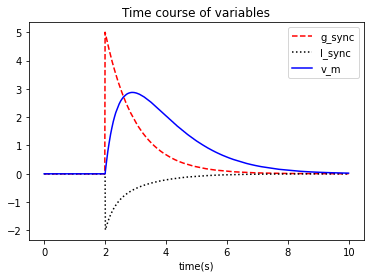

In [46]:
%matplotlib inline

plt.plot(t, g_syn*5, "--r", label="g_sync")
plt.plot(t, I_syn/5, ":k", label= "I_sync")
plt.plot(t, v_m, "b", label= "v_m")

plt.legend()

plt.title("Time course of variables")
plt.xlabel("time(s)")
